<a href="https://colab.research.google.com/github/dBalag/Chinook/blob/main/4_Chinook_Bivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bivariate Analytical Techniques**.
Involves the analysis of two variables to understand the relationship between them.

1. Correlation Analysis:
This technique helps you understand the linear relationship between two numerical variables x example: quantity x unit price from Invoice_line dataset and bytes x unit_price from Track dataset.


In [ ]:
import pandas as pd
from google.colab import files

# Upload the files
uploaded = files.upload()

# Load datasets
media_type = pd.read_csv('media_type.csv')
playlist = pd.read_csv('playlist.csv')
playlist_track = pd.read_csv('playlist_track.csv')
album = pd.read_csv('album.csv')
artist = pd.read_csv('artist.csv')
employee_cleaned = pd.read_csv('employee_cleaned.csv')
invoice_cleaned = pd.read_csv('invoice_cleaned.csv')
invoice_line = pd.read_csv('invoice_line.csv')
track_cleaned = pd.read_csv('track_cleaned.csv')
genre = pd.read_csv('genre.csv')
customer_cleaned = pd.read_csv('customer_cleaned.csv')

Saving album.csv to album.csv
Saving artist.csv to artist.csv
Saving customer_cleaned.csv to customer_cleaned.csv
Saving employee_cleaned.csv to employee_cleaned.csv
Saving genre.csv to genre.csv
Saving invoice_cleaned.csv to invoice_cleaned.csv
Saving invoice_line.csv to invoice_line.csv
Saving media_type.csv to media_type.csv
Saving playlist.csv to playlist.csv
Saving playlist_track.csv to playlist_track.csv
Saving track_cleaned.csv to track_cleaned.csv


Correlation matrix of 'unit_price' vs 'quantity' from Invoice_line dataset

In [ ]:
# Calculate correlation matrix
correlation_matrix = invoice_line[['unit_price', 'quantity']].corr()
print(correlation_matrix)

            unit_price  quantity
unit_price         1.0       NaN
quantity           NaN       NaN


Diagonals (unit_price x unit_price & quantity x quantity) both should be 1.0 meaning that are correlated, but quantity column is not numerical, we need to convert it.


In [ ]:
# Convert column to numeric
invoice_line['quantity'] = pd.to_numeric(invoice_line['quantity'], errors='coerce')
invoice_line['unit_price'] = pd.to_numeric(invoice_line['unit_price'], errors='coerce')


In [ ]:
# Recalculate the correlation between 'quantity' and 'unit_price'
correlation = invoice_line[['quantity', 'unit_price']].corr()
print("Correlation matrix between 'quantity' and 'unit_price':")
print(correlation)


Correlation matrix between 'quantity' and 'unit_price':
            quantity  unit_price
quantity         NaN         NaN
unit_price       NaN         1.0


In [ ]:
# Hadn't been solved the issue. Let's check for unique values in 'quantity'
print("\nUnique values in 'quantity' column:")
print(invoice_line['quantity'].unique())


Unique values in 'quantity' column:
[1]


Since the quantity column contains only a single unique value [1], it explains why the correlation calculation with unit_price returns NaN. Correlation requires variability in the data, and having a single unique value means there is no variability in the quantity column, making it impossible to compute a meaningful correlation.


Correlation Matrix of 'bytes' and 'unit_price' from Tracks dataset.

In [ ]:
# Calculate the correlation
correlation = track_cleaned[['bytes', 'unit_price']].corr()
print("Correlation matrix between 'bytes' and 'unit_price':")
print(correlation)

Correlation matrix between 'bytes' and 'unit_price':
               bytes  unit_price
bytes       1.000000    0.938482
unit_price  0.938482    1.000000



*   Value Range: The Pearson correlation coefficient ranges from -1 to 1:

      1 indicates a perfect positive correlation.

      (-1) indicates a perfect negative correlation.

      0 indicates no correlation.

*   0.938482: This value is very close to 1, indicating a strong positive correlation between 'bytes' and 'unit_price'.

    This means that as the number of bytes increases, the unit price also tends to increase. Conversely, if the bytes decrease, the unit price tends to decrease as well.


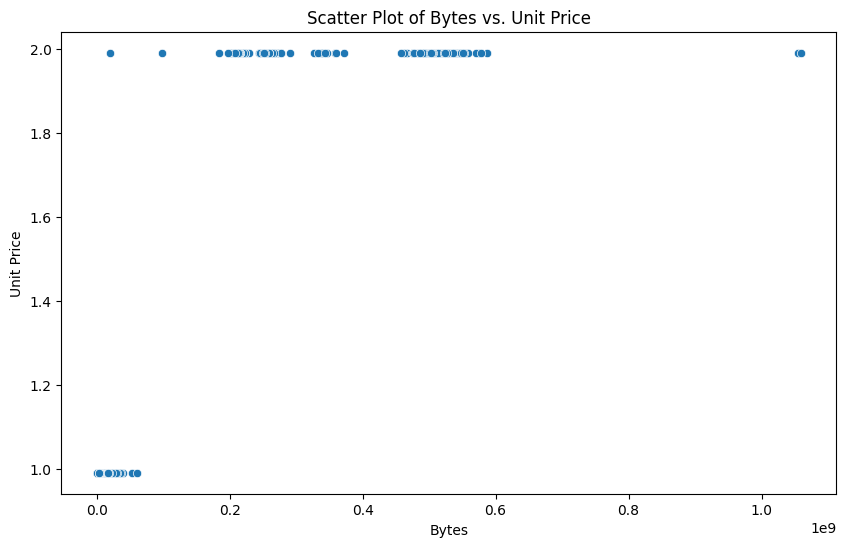

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming invoice_line_cleaned is the dataframe containing the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bytes', y='unit_price', data=track_cleaned)
plt.title('Scatter Plot of Bytes vs. Unit Price')
plt.xlabel('Bytes')
plt.ylabel('Unit Price')
plt.show()


This scatter plot helps us visually assess the strong positive correlation between 'bytes' and 'unit_price'.

# 2. Box Plot
can be used to compare the distribution of a numerical variable across the categories of a categorical variable.

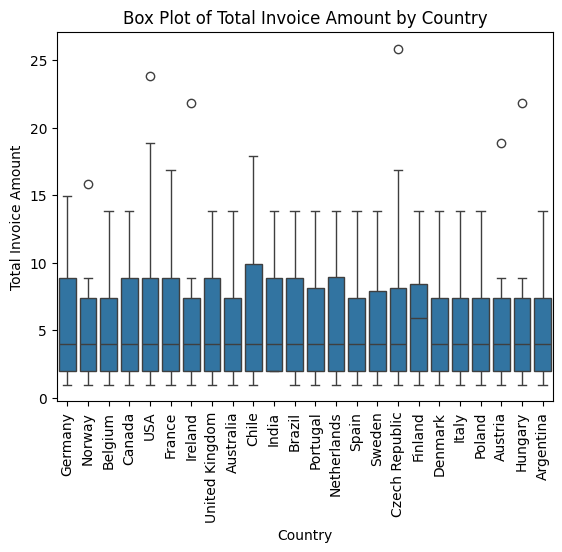

In [ ]:
# Box plot of total invoice amount by country
sns.boxplot(data=invoice_cleaned, x='billing_country', y='total')
plt.title('Box Plot of Total Invoice Amount by Country')
plt.xlabel('Country')
plt.ylabel('Total Invoice Amount')
plt.xticks(rotation=90)
plt.show()


  1. Median (the line inside each box): This is the middle value of the invoice amounts for each country. If the line is closer to the top of the box, then the majority of the data is skewed towards higher invoice amounts, x example Finland.
  If it’s closer to the bottom, it’s skewed towards lower amounts, x ex rest of the countries.

  2.Interquartile Range (the box itself): This range contains the middle 50% of the invoice amounts for each country. A larger box means that the invoice amounts are more spread out, x example Chile; a smaller box means they’re more concentrated.

  3.Whiskers (the lines extending from the box): These represent the range of the invoice amounts that fall within 1.5 times the IQR. If the whiskers are long, it means there is a large variability in invoice amounts, x ex. USA; short whiskers mean the amounts are more consistent, x ex. Norway.

  4.Outliers (the points beyond the whiskers): These are invoice amounts that fall outside 1.5 times the IQR. They could indicate unusually high or low invoices compared to the rest, x ex. Czech Republic

## 3. Bar Plot
Bar plots can be used to compare the mean or sum of a numerical variable across categories of a categorical variable.

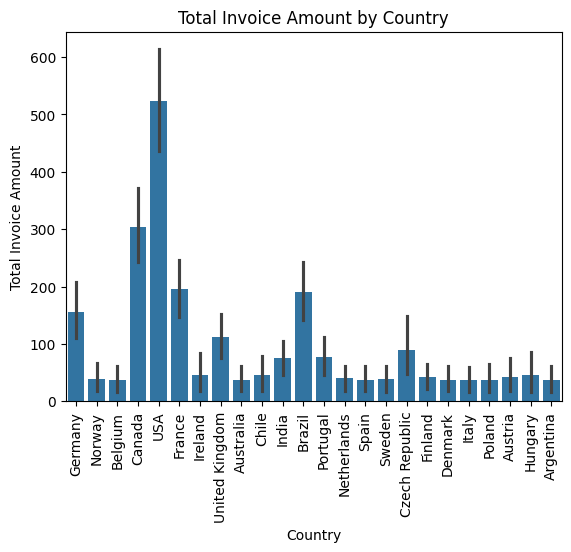

In [ ]:
# Merge datasets to get total invoice x customer country.
merged_df = pd.merge(invoice_cleaned, customer_cleaned, on='customer_id')

# Bar plot
sns.barplot(data=merged_df, x='country', y=total', estimator=sum)
plt.title('Total Invoice Amount by Country')
plt.xlabel('Country')
plt.ylabel('Total Invoice Amount')
plt.xticks(rotation=90)
plt.show()


# 4. Group By and Aggregate
Using group by and aggregate functions to summarize data.

In [ ]:
# Group by country and calculate the total invoice amount
country_invoice_total = merged_df.groupby('country')['total'].sum().reset_index()
print(country_invoice_total)

           country   total
0        Argentina   37.62
1        Australia   37.62
2          Austria   42.62
3          Belgium   37.62
4           Brazil  190.10
5           Canada  303.96
6            Chile   46.62
7   Czech Republic   90.24
8          Denmark   37.62
9          Finland   41.62
10          France  195.10
11         Germany  156.48
12         Hungary   45.62
13           India   75.26
14         Ireland   45.62
15           Italy   37.62
16     Netherlands   40.62
17          Norway   39.62
18          Poland   37.62
19        Portugal   77.24
20           Spain   37.62
21          Sweden   38.62
22             USA  523.06
23  United Kingdom  112.86


In [ ]:
# Merge the two datasets on 'customer_id'
merged_df = pd.merge(invoice_cleaned, customer_cleaned, on='customer_id')

# Create a new column for customer full name
merged_df['customer_name'] = merged_df['first_name'] + ' ' + merged_df['last_name']

# Group by customer name and calculate the total invoice amount
total_invoice_amount = merged_df.groupby('customer_name')['total'].sum().reset_index()

# Sort the customers by total invoice amount in descending order and get the top 5
top_customers = total_invoice_amount.sort_values(by='total', ascending=False).head(5)

# Print the result
print(top_customers)

         customer_name  total
22         Helena Holý  49.62
50  Richard Cunningham  47.62
37          Luis Rojas  46.62
23       Hugh O'Reilly  45.62
34     Ladislav Kovács  45.62


# 5.Pair Plot
Pair plots show the pairwise relationships between multiple numerical variables in the dataset.

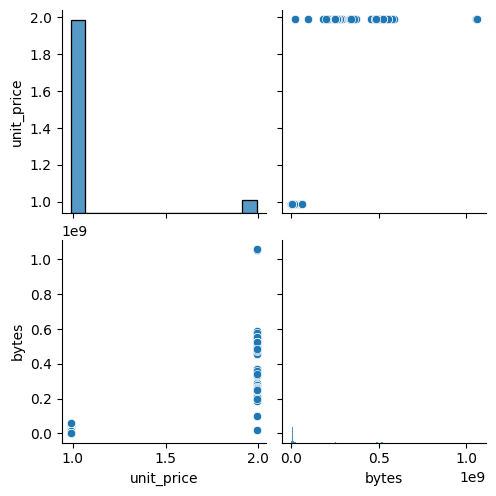

In [ ]:
# Pair plot of numerical columns in invoice_line_cleaned
sns.pairplot(track_cleaned[['unit_price', 'bytes']])
plt.show()

  1. ‘unit_price’ vs ‘bytes’: Lower-priced units tend to have more variability in bytes. As the unit price increases, the variability in bytes decreases.

  2.‘bytes’ vs ‘bytes’: There are many instances where the byte size is small, but few where it is large, with no discernible trend or correlation.

  3.‘unit_price’ vs ‘unit_price’: Units with lower prices and smaller sizes (in bytes) are more common. There is an outlier representing a unit with a high price and large size.

These plots suggest that in the context of streamline music marketplace unit price might affect data size preferences or offerings.

# 6. Crosstab
Crosstabs are used to compute frequency, this case invoices x city and country.

In [ ]:
# Crosstab of billing country and billing city
crosstab = pd.crosstab(invoice_cleaned['billing_country'], invoice_cleaned['billing_city'])
print(crosstab)


billing_city     Amsterdam  Bangalore  Berlin  Bordeaux  Boston  Brasília  \
billing_country                                                             
Argentina                0          0       0         0       0         0   
Australia                0          0       0         0       0         0   
Austria                  0          0       0         0       0         0   
Belgium                  0          0       0         0       0         0   
Brazil                   0          0       0         0       0         7   
Canada                   0          0       0         0       0         0   
Chile                    0          0       0         0       0         0   
Czech Republic           0          0       0         0       0         0   
Denmark                  0          0       0         0       0         0   
Finland                  0          0       0         0       0         0   
France                   0          0       0         7       0         0   